# AutoEDA Workspace

In [9]:
import pandas as pd
from sklearn import datasets

In [4]:
features, output, coef = datasets.make_regression(n_samples = 80, n_features = 4, n_informative = 4, n_targets = 1, noise = 0.0, coef = True)
data = pd.DataFrame(features, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])

## Intended Order of Operations for AutoEDA

Missing value wrangler package:
1. Wrangle missing values


Visualization package:
1. Histogram with overlaid KDE
2. Quantile-quantile plot
3. Theoretical distribution mapper

## *Function*: Histogram with KDE

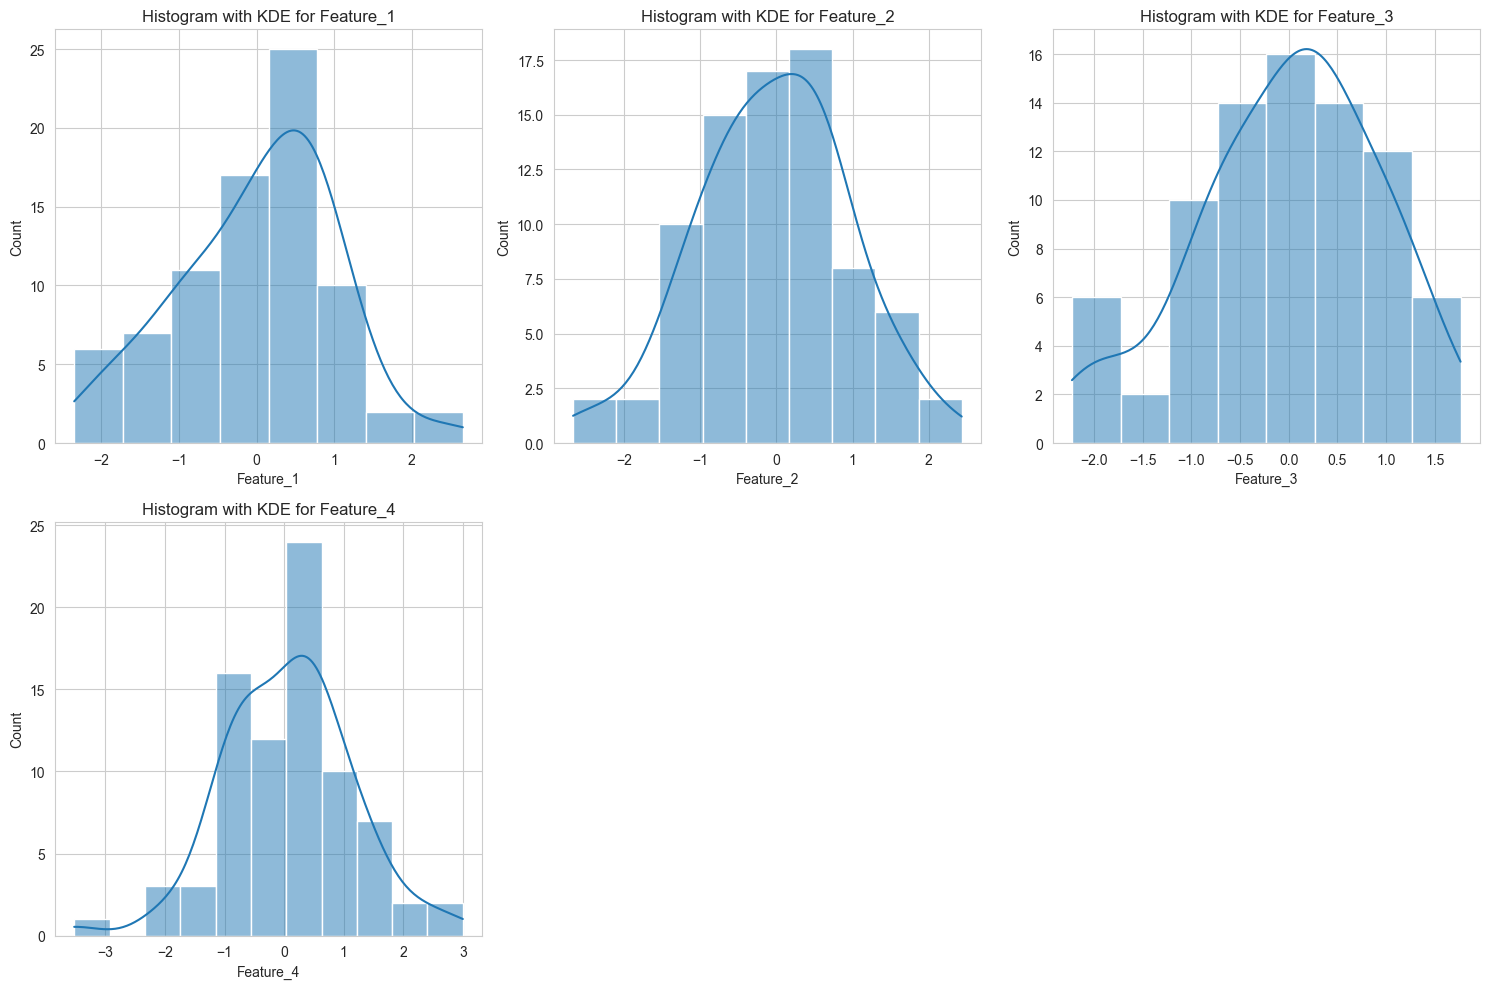

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_with_kde(data, stat=None, bins=None, discrete=None, inverted=False):
    """
    Plot a histogram of the given data and overlay the seaborn kernel density estimation.

    Parameters:
    - data (dataframe): The input data.
    - stat (str): For discrete values, set stat as 'proportion', 'probability', or 'percent'. 
                  For continuous values, set stat as 'count', 'frequency', or 'density'.
    - bins (integer): Number of histogram bins.
    - discrete (bool): Whether values are discrete or continuous.
    """

    sns.set_style("whitegrid")
    if bins == None: 
        bins = 'auto'

    num_cols = data.shape[1]
    nrows = num_cols // 3 + (1 if num_cols % 3 else 0)
    # Handle case with less than 3 columns
    ncols = min(3, num_cols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
    
    # Convert to 2D array for consistent indexing
    if nrows == 1 and ncols == 1: axes = np.array([[axes]])
    elif nrows == 1: axes = axes[np.newaxis, :]
    elif ncols == 1: axes = axes[:, np.newaxis]

    for idx, col_name in enumerate(data.columns):
        row, col = divmod(idx, 3)

        if inverted == False: sns.histplot(data, x=col_name, stat=stat, bins=bins, discrete=discrete, kde=True, ax=axes[row, col])
        else: sns.histplot(data, y=col_name, stat=stat, bins=bins, discrete=discrete, kde=True, ax=axes[row, col])

        axes[row, col].set_title(f"Histogram with KDE for {col_name}")

    # Turn off the axes for empty subplots
    for j in range(num_cols, nrows*ncols):
        axes.ravel()[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_histogram_with_kde(data, stat = 'count', bins = None, discrete = False, inverted = False)

## *Function*: Quantile-Quantile Plot

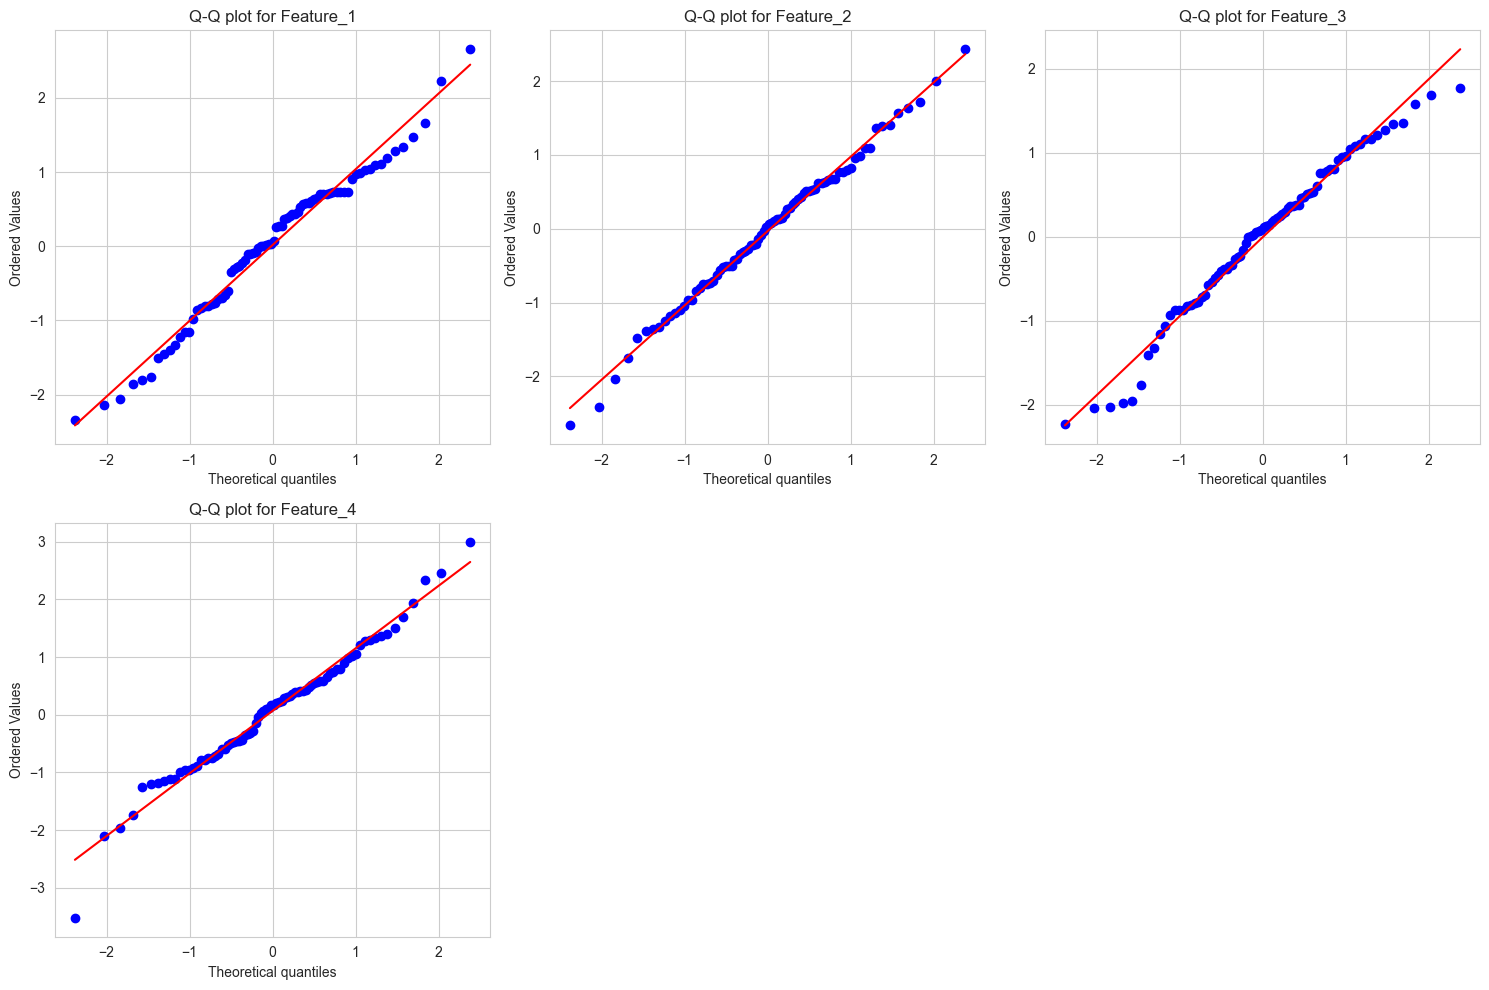

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

def plot_qq(data):
    """
    Plot Q-Q plots for each column in the data.

    Parameters:
    - data (dataframe): The input data.
    """
    sns.set_style("whitegrid")

    num_cols = data.shape[1]
    nrows = num_cols // 3 + (1 if num_cols % 3 else 0)
    ncols = 3

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

    for idx, (ax, col_name) in enumerate(zip(axes.ravel(), data.columns)):
        probplot(data[col_name].dropna(), plot=ax)  # Drop NA values for the probplot
        ax.set_title(f"Q-Q plot for {col_name}")

    # Turn off the axes for empty subplots
    for j in range(num_cols, nrows*ncols):
        axes.ravel()[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_qq(data)

## *Function*: Theoretical Distribution Identifier

In [10]:
from distfit import distfit

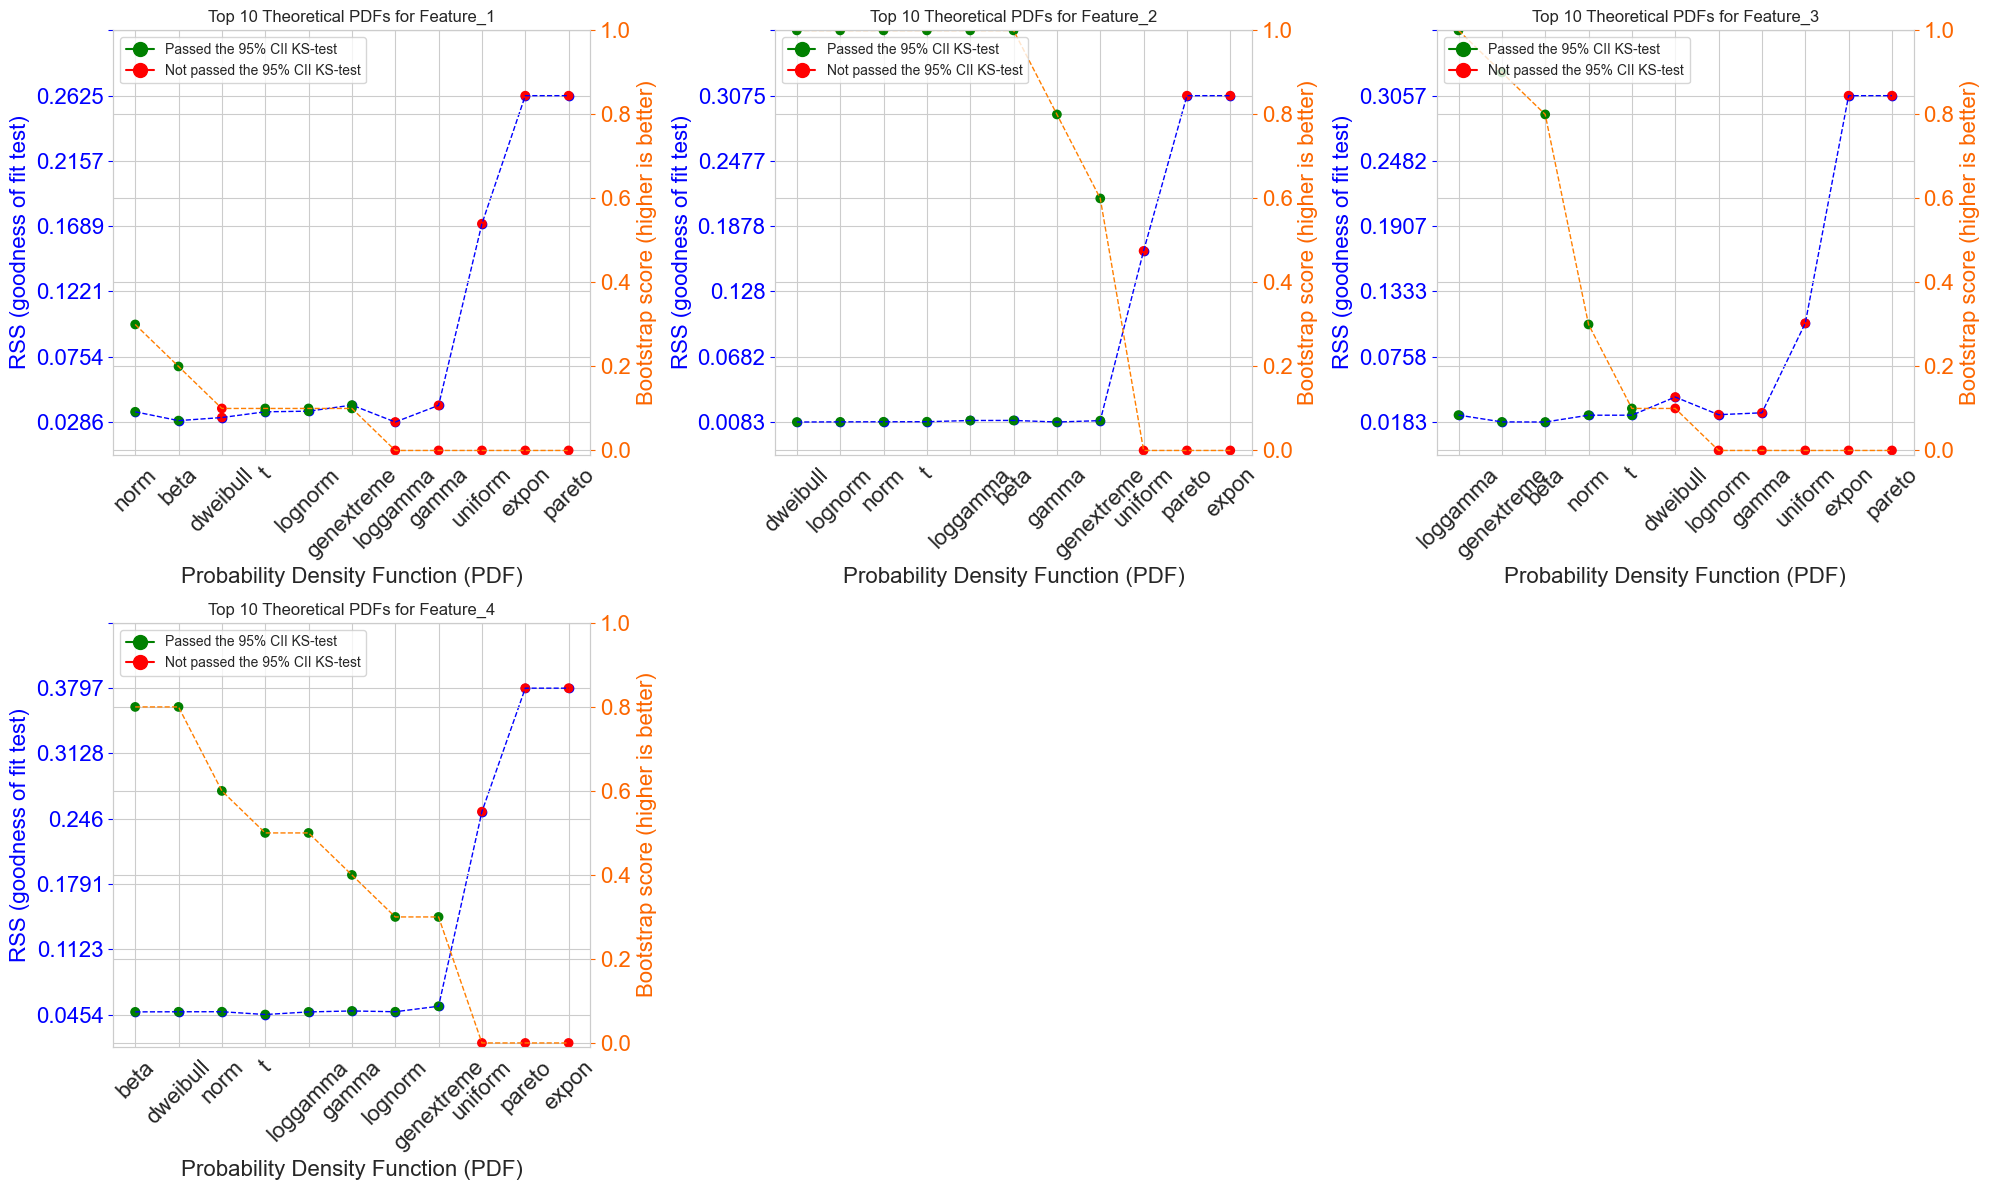

In [18]:
def TheoreticalDistributionMatcher(data, method = None, alpha = None, bins = None, discrete = None, tested_dists = None, n_boots = None):
    """
    Produce top 10 performing theoretical PDFs given empirical distribution of data.

    Parameters:
    - data (dataframe): The input data.
    - method (str): Specify the method type --> 'parametric', 'quantiles', 'percentiles', 'discrete'
    - alpha (float): Significance alpha.
    - bins (int): Number of histogram bins.
    - discrete (bool): Whether values are discrete or continuous.
    - tested_dists (str): Specify testing all or popular distributions --> 'full', 'popular'
    - n_boots (int): Number of bootstrap repetitions.

    Note: Computation time scales with quantity of bootstraps and parameters
    """
    
    num_cols = data.shape[1]
    nrows = num_cols // 3 + (1 if num_cols % 3 else 0)
    ncols = 3

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows))

    if method == None:
        if discrete == True: method = 'discrete'
        else: method = 'parametric'
    if alpha == None: alpha = 0.05
    if bins == None: bins = 'auto'
    if tested_dists == None: tested_dists = 'popular'
    if n_boots == None: n_boots = 100

    dfit = distfit(method = method, alpha = alpha, distr = tested_dists, n_boots = n_boots, verbose = 0)

    for idx, (ax, col_name) in enumerate(zip(axes.ravel(), data.columns)):
        results = dfit.fit_transform(data[col_name].dropna())
        dfit.plot_summary(ax = ax)
        ax.set_title(f"Top 10 Theoretical PDFs for {col_name}")

    # Turn off the axes for empty subplots
    for j in range(num_cols, nrows*ncols):
        axes.ravel()[j].axis('off')

    plt.tight_layout()
    plt.show()

TheoreticalDistributionMatcher(data)

## *Function*: NaN Auto-Wrangler

In [ ]:
def NaN_AutoWrangler(data):
    """
    
    """


    